In [39]:
# Import necessary libraries
import numpy as np
import pandas as pd

from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [ ]:
# Load TSV file
file_path = '../data/00_raw_data/amazon_reviews_us_Books_v1_02.tsv' 
df = pd.read_csv(file_path, sep='\t', on_bad_lines='skip', low_memory=False)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3105370 entries, 0 to 3105369
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   marketplace        object 
 1   customer_id        int64  
 2   review_id          object 
 3   product_id         object 
 4   product_parent     int64  
 5   product_title      object 
 6   product_category   object 
 7   star_rating        float64
 8   helpful_votes      float64
 9   total_votes        float64
 10  vine               object 
 11  verified_purchase  object 
 12  review_headline    object 
 13  review_body        object 
 14  review_date        object 
dtypes: float64(3), int64(2), object(10)
memory usage: 355.4+ MB


In [9]:
# Convert review_date to datetime
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

# Filter for 2003–2005
df = df[(df['review_date'].dt.year >= 2003) & (df['review_date'].dt.year <= 2005)]

print(f"Shape of dataset: {df.shape}")

Shape of dataset: (1286157, 15)


In [10]:
# Check the first few rows
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12076615,RQ58W7SMO911M,0385730586,122662979,Sisterhood of the Traveling Pants (Book 1),Books,4.0,2.0,3.0,N,N,this book was a great learning novel!,this boook was a great one that you could lear...,2005-10-14
1,US,12703090,RF6IUKMGL8SF,0811828964,56191234,The Bad Girl's Guide to Getting What You Want,Books,3.0,5.0,5.0,N,N,Fun Fluff,If you are looking for something to stimulate ...,2005-10-14
2,US,12257412,R1DOSHH6AI622S,1844161560,253182049,"Eisenhorn (A Warhammer 40,000 Omnibus)",Books,4.0,1.0,22.0,N,N,this isn't a review,never read it-a young relative idicated he lik...,2005-10-14
3,US,50732546,RATOTLA3OF70O,0373836635,348672532,Colby Conspiracy (Colby Agency),Books,5.0,2.0,2.0,N,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,2005-10-14
4,US,51964897,R1TNWRKIVHVYOV,0262181533,598678717,The Psychology of Proof: Deductive Reasoning i...,Books,4.0,0.0,2.0,N,N,Execellent cursor examination,Review based on a cursory examination by Unive...,2005-10-14


In [ ]:
# Save the filtered DataFrame to a new TSV file
filtered_data_file_path = '../data/01_filtered_data/filtered_data.tsv'
df.to_csv(filtered_data_file_path, sep='\t', index=False)

In [ ]:
# Load the filtered DataFrame to a new TSV file
filtered_data_file_path = '../data/01_filtered_data/filtered_data.tsv'
df = pd.read_csv(filtered_data_file_path, sep='\t', low_memory=False)

# Convert review_date to datetime
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

## Data Inspection

In [45]:
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286157 entries, 0 to 1286156
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   marketplace        1286157 non-null  object        
 1   customer_id        1286157 non-null  int64         
 2   review_id          1286157 non-null  object        
 3   product_id         1286157 non-null  object        
 4   product_parent     1286157 non-null  int64         
 5   product_title      1286157 non-null  object        
 6   product_category   1286157 non-null  object        
 7   star_rating        1286157 non-null  float64       
 8   helpful_votes      1286157 non-null  float64       
 9   total_votes        1286157 non-null  float64       
 10  vine               1286157 non-null  object        
 11  verified_purchase  1286157 non-null  object        
 12  review_headline    1286122 non-null  object        
 13  review_body        1286157 

In [46]:
# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing[missing > 0])

Missing Values:
 review_headline    35
dtype: int64


In [47]:
# Basic statistics
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
marketplace,1286157,1,US,1286157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,1286157.0,NaN,NaN,NaN,38867915.346105,12065385.0,29569024.0,40908234.0,50833636.0,53096582.0,12654678.087019
review_id,1286157,1286157,RQ58W7SMO911M,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,1286157,415877,043935806X,4625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_parent,1286157.0,NaN,NaN,NaN,503799909.463621,689.0,257189885.0,505671530.0,752588489.0,999997462.0,287476433.228805
product_title,1286157,389930,Harry Potter and the Order of the Phoenix (Boo...,4862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category,1286157,1,Books,1286157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
star_rating,1286157.0,NaN,NaN,NaN,4.132779,1.0,4.0,5.0,5.0,5.0,1.286449
helpful_votes,1286157.0,NaN,NaN,NaN,9.724738,0.0,1.0,4.0,10.0,6539.0,26.982121
total_votes,1286157.0,NaN,NaN,NaN,13.426951,0.0,2.0,6.0,14.0,6634.0,32.315047


## Exploratory Data Analysis

#### Review Lengths

In [15]:
df['review_length'] = df['review_body'].astype(str).apply(len)
df['review_word_count'] = df['review_body'].astype(str).apply(lambda x: len(x.split()))

#### Helpfulness Ratio

In [40]:
# Calculate helpful ratio
def wilson_lower_bound(helpful, total, confidence=0.95):
    if total == 0:
        return 0  # No data → rank low
    z = norm.ppf(1 - (1 - confidence) / 2)
    phat = helpful / total
    return (phat + z**2 / (2 * total) - z * np.sqrt(
        (phat * (1 - phat) + z**2 / (4 * total)) / total)
    ) / (1 + z**2 / total)

In [48]:
# Create a flag for engaged reviews
df['engaged'] = df['total_votes'] > 0

In [49]:
# Calculate helpful ratio
"""Confidence Interval controls how cautious the Wilson score is when estimating 
   how helpful a review truly is, based on observed helpful votes.
"""
df['helpful_ratio'] = df.apply(
    lambda row: wilson_lower_bound(row['helpful_votes'], row['total_votes']),
    axis=1
)

####  Class Distribution 

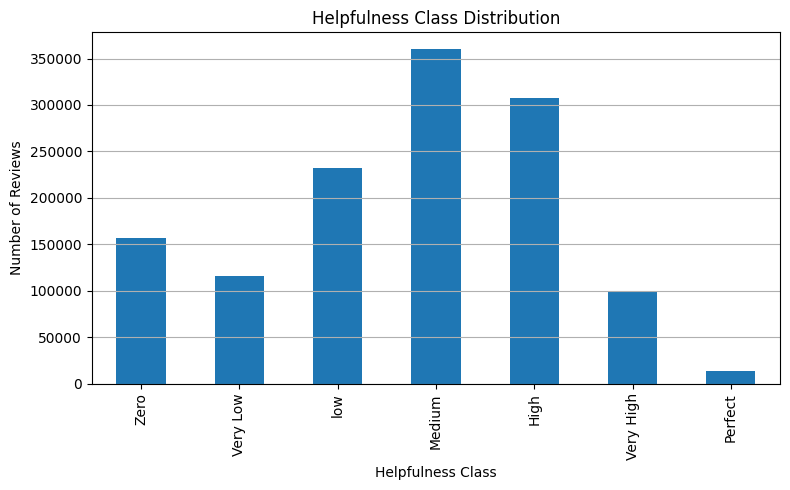

In [56]:
# Define bins and labels for classifying helpfulness scores
bins = [-0.01, 0.0, 0.10, 0.25, 0.5, 0.75, 0.90, 1.0]
labels = ['Zero', 'Very Low', 'low', 'Medium', 'High', 'Very High', 'Perfect']

# Categorize the Wilson score into classes
df['helpful_class'] = pd.cut(df['helpful_ratio'], bins=bins, labels=labels, include_lowest=True)

# Count the distribution
class_distribution = df['helpful_class'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar')
plt.title('Helpfulness Class Distribution')
plt.xlabel('Helpfulness Class')
plt.ylabel('Number of Reviews')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Star Ratings vs Helpfulness

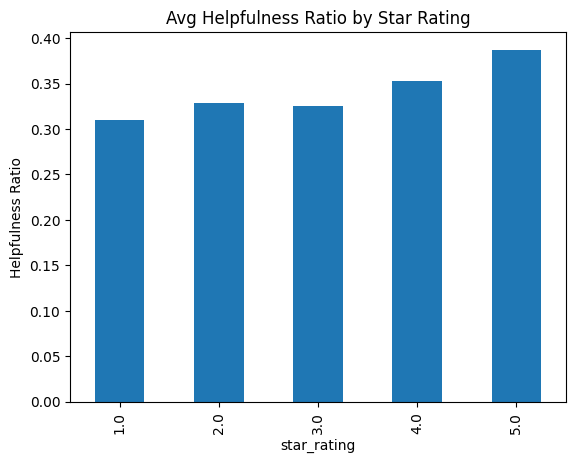

In [52]:
df.groupby('star_rating')['helpful_ratio'].mean().plot(kind='bar')
plt.title('Avg Helpfulness Ratio by Star Rating')
plt.ylabel('Helpfulness Ratio')
plt.show()

#### Top books by review count and their helpfulness.

In [ ]:
# Top 10 products by review count
top_products = df['product_parent'].value_counts().head(10).index

# Map a representative product title for each product_parent
title_map = df[df['product_parent'].isin(top_products)].groupby('product_parent')['product_title'] \
             .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])

# Filter and assign titles for plotting
plot_df = df[df['product_parent'].isin(top_products)].copy()
plot_df['product_title_mapped'] = plot_df['product_parent'].map(title_map)
plot_df['review_length'] = plot_df['review_body'].astype(str).str.len()  # precompute safely

# Group and summarize
summary_df = plot_df.groupby('product_parent').agg({
    'product_title_mapped': 'first',
    'review_id': 'count',
    'helpful_votes': 'sum',
    'total_votes': 'sum',
    'star_rating': 'mean',
    'review_length': 'mean' 
}).rename(columns={
    'review_id': 'review_count',
    'review_length': 'avg_review_length'
}).sort_values(by='review_count', ascending=False)

summary_df

,product_title_mapped,review_count,helpful_votes,total_votes,star_rating,avg_review_length
product_parent,,,,,,
667539744,Harry Potter and the Order of the Phoenix (Boo...,6442,10720.0,20786.0,4.442409,1058.761254
315416156,The Da Vinci Code,3199,25712.0,44220.0,3.551422,1027.506408
857217799,Lies and the Lying Liars Who Tell Them,2785,31819.0,69402.0,3.856373,933.080431
829131114,Unfit For Command: Swift Boat Veterans Speak O...,2618,75853.0,130638.0,3.449962,1007.334225
162568542,Harry Potter and the Half-Blood Prince (Book 6),2351,13094.0,24826.0,4.245002,1189.805189
656525801,"Crossroads of Twilight (The Wheel of Time, Boo...",2275,23994.0,33435.0,1.711209,993.888352
820650568,Treason: Liberal Treachery from the Cold War t...,1830,23845.0,49053.0,2.977596,946.000000
342317933,Eragon (Inheritance),1546,13636.0,21780.0,3.574386,1024.765201
541105320,"Deliver Us from Evil: Defeating Terrorism, Des...",1532,19251.0,38558.0,3.760444,751.817885


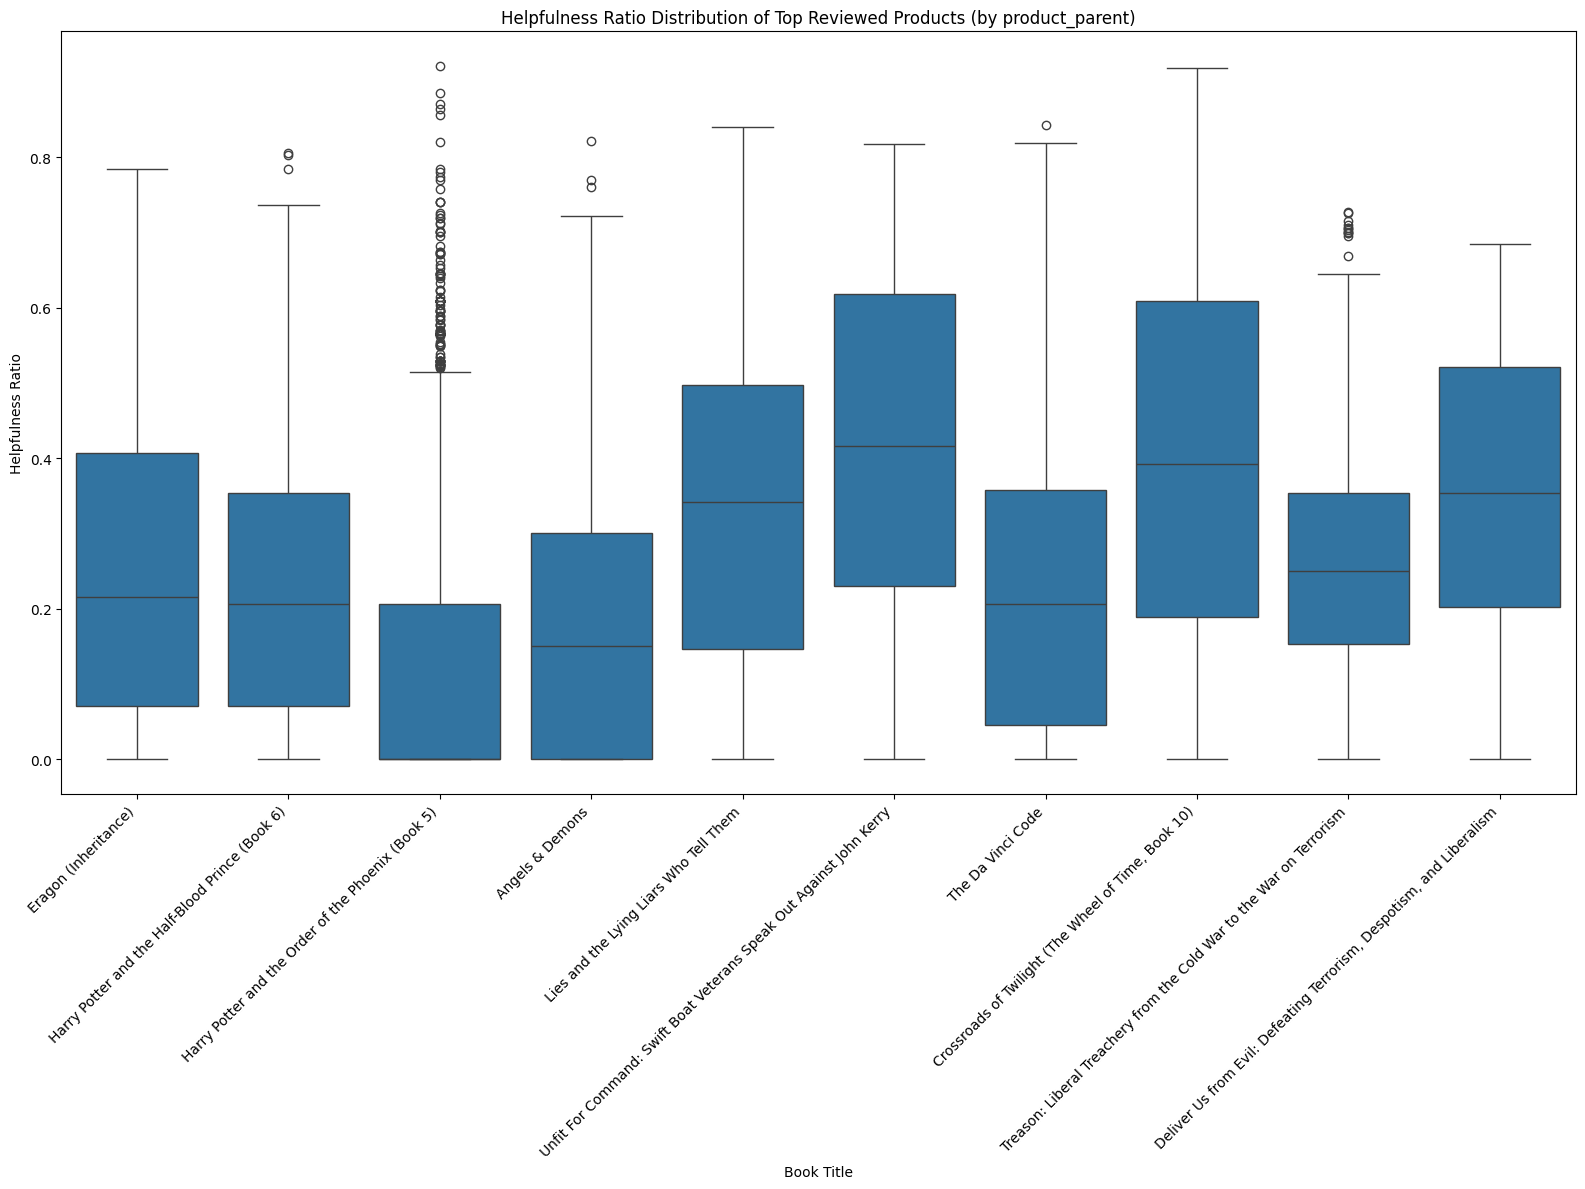

In [ ]:
plt.figure(figsize=(16, 12))
sns.boxplot(data=plot_df, x='product_title_mapped', y='helpful_ratio')
plt.xticks(rotation=45, ha='right')  # tilt and align right
plt.title("Helpfulness Ratio Distribution of Top Reviewed Products (by product_parent)")
plt.xlabel("Book Title")
plt.ylabel("Helpfulness Ratio")
plt.tight_layout()
plt.show()

#### Review Helpfulness vs Review Count per Product

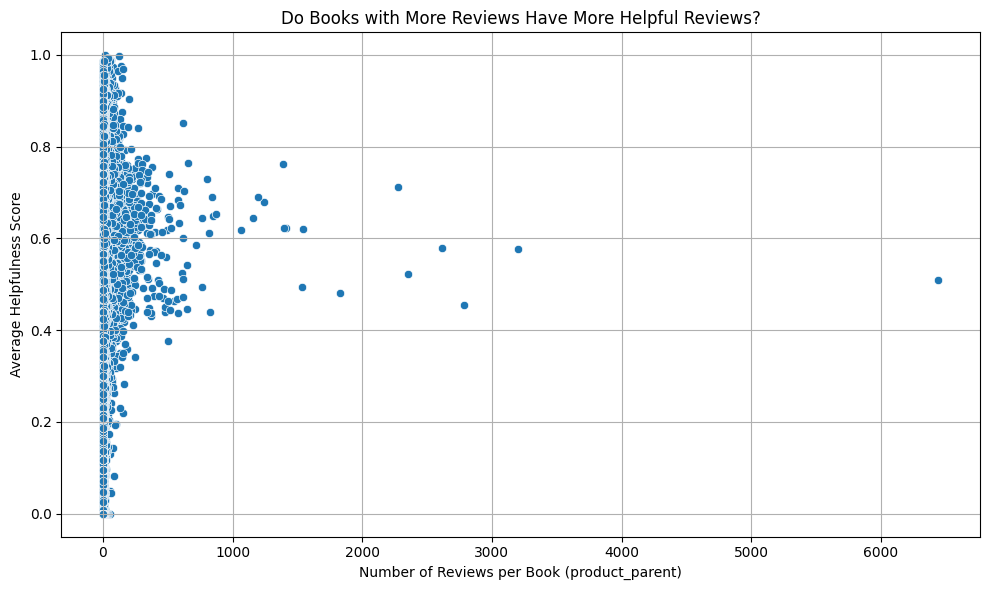

In [72]:
# Aggregate by product_parent
book_stats = df.groupby('product_parent').agg({
    'review_id': 'count',
    'helpful_votes': 'sum',
    'total_votes': 'sum'
}).rename(columns={'review_id': 'review_count'})

# Apply Wilson score
book_stats['wilson_score'] = book_stats.apply(
    lambda row: wilson_lower_bound(row['helpful_votes'], row['total_votes']), axis=1
)

# Optional: add readable title for hover / annotation
title_map = df.groupby('product_parent')['product_title'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])
book_stats['product_title'] = book_stats.index.map(title_map)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=book_stats, x='review_count', y='wilson_score')

plt.xlabel("Number of Reviews per Book (product_parent)")
plt.ylabel("Average Helpfulness Score")
plt.title("Do Books with More Reviews Have More Helpful Reviews?")
plt.grid(True)
plt.tight_layout()
plt.show()

#### Temporal Trends in Helpfulness

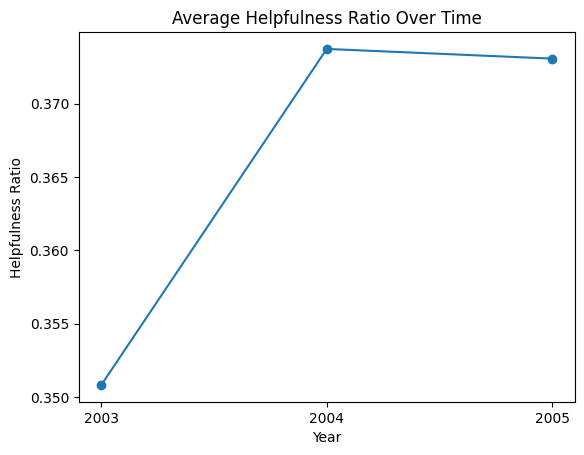

In [73]:
df['year'] = df['review_date'].dt.year.astype('Int64')
helpfulness_by_year = df.groupby('year')['helpful_ratio'].mean().reset_index()

plt.plot(helpfulness_by_year['year'], helpfulness_by_year['helpful_ratio'], marker='o')
plt.title("Average Helpfulness Ratio Over Time")
plt.xlabel("Year")
plt.ylabel("Helpfulness Ratio")
plt.xticks(helpfulness_by_year['year']) 
plt.show()

#### Does Review Length Correlate with Helpfulness?

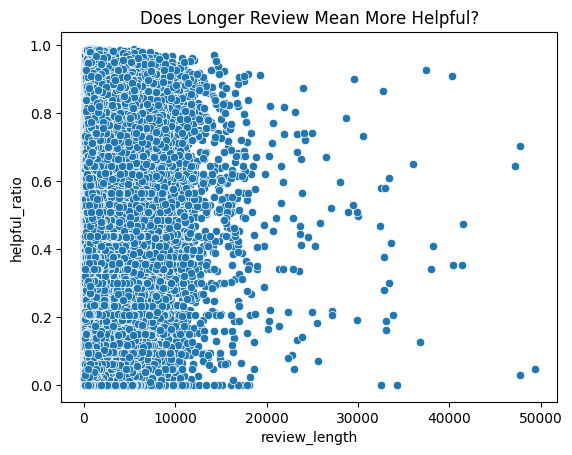

In [75]:
df['review_length'] = df['review_body'].astype(str).apply(len)

sns.scatterplot(x='review_length', y='helpful_ratio', data=df)
plt.title("Does Longer Review Mean More Helpful?")
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_22124\1263413366.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('length_bin')['helpful_ratio'].mean().plot(kind='bar')


Text(0.5, 1.0, 'Avg Helpfulness by Review Length Bin')

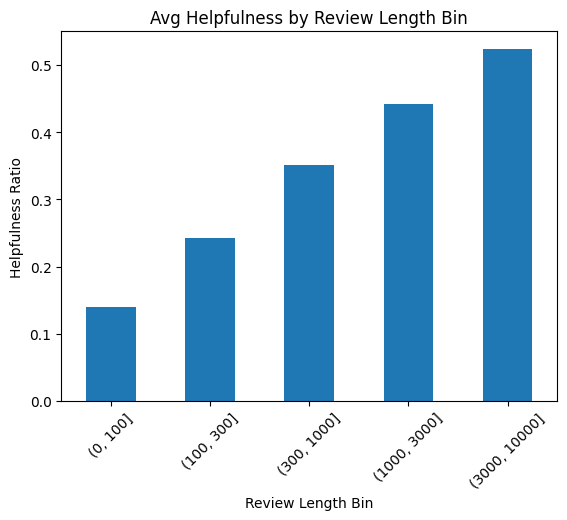

In [76]:
df['length_bin'] = pd.cut(df['review_length'], bins=[0, 100, 300, 1000, 3000, 10000])
df.groupby('length_bin')['helpful_ratio'].mean().plot(kind='bar')
plt.xlabel("Review Length Bin")
plt.xticks(rotation=45)
plt.ylabel("Helpfulness Ratio")
plt.title("Avg Helpfulness by Review Length Bin")

#### Verified vs Non-Verified Purchases

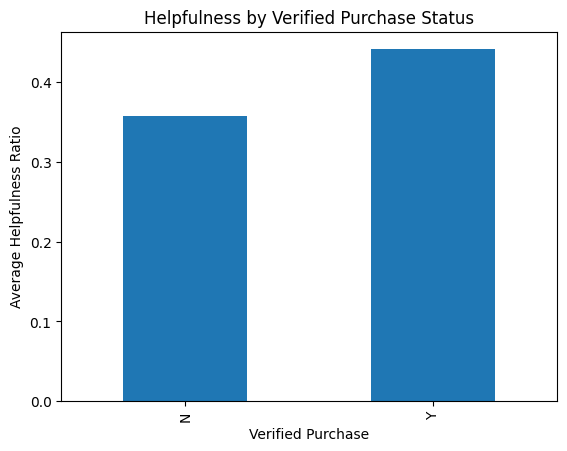

In [77]:
df.groupby('verified_purchase')['helpful_ratio'].mean().plot(kind='bar')
plt.title("Helpfulness by Verified Purchase Status")
plt.xlabel("Verified Purchase")
plt.ylabel("Average Helpfulness Ratio")
plt.show()

####  Vine Reviews (Paid/Promoted) vs Organic

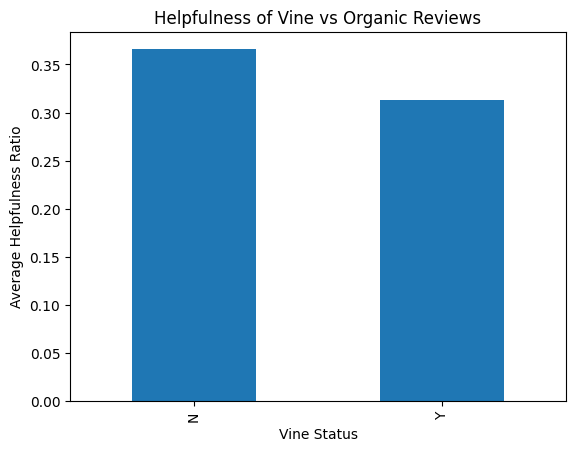

In [78]:
df['vine'].value_counts()
df.groupby('vine')['helpful_ratio'].mean().plot(kind='bar')
plt.xlabel("Vine Status")
plt.ylabel("Average Helpfulness Ratio")
plt.title("Helpfulness of Vine vs Organic Reviews")
plt.show()

#### Review Headline vs Helpfulness

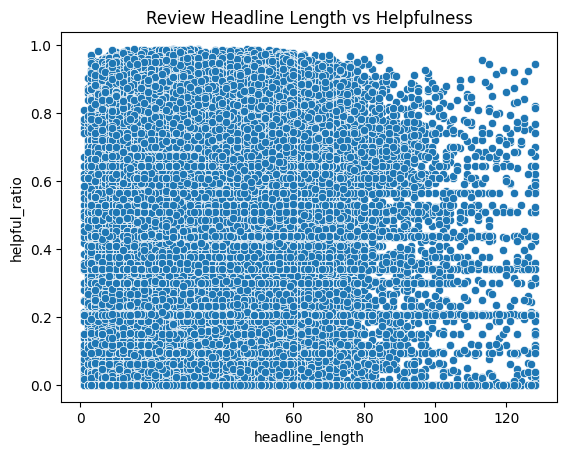

In [79]:
df['headline_length'] = df['review_headline'].astype(str).apply(len)

# Length vs helpfulness
sns.scatterplot(x='headline_length', y='helpful_ratio', data=df)
plt.title("Review Headline Length vs Helpfulness")
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_22124\4034794117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('headline_len_bin')['helpful_ratio'].mean().plot(kind='bar')


Text(0.5, 1.0, 'Avg Helpfulness by Headline Length Bin')

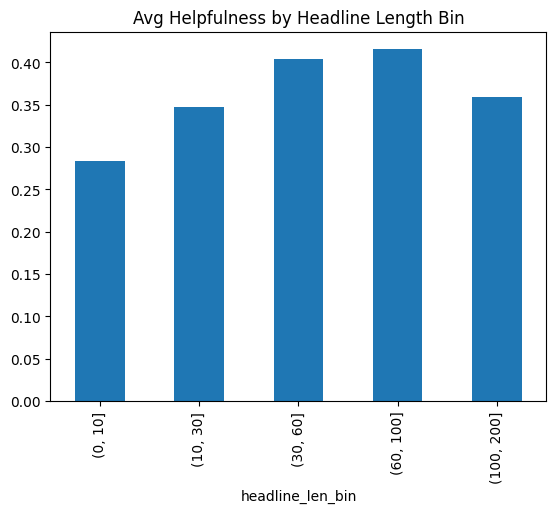

In [80]:
df['headline_len_bin'] = pd.cut(df['headline_length'], bins=[0, 10, 30, 60, 100, 200])
df.groupby('headline_len_bin')['helpful_ratio'].mean().plot(kind='bar')
plt.title("Avg Helpfulness by Headline Length Bin")

#### Top Reviewers by Review Count

In [82]:
reviewer_stats = df.groupby('customer_id').agg({
    'review_id': 'count',
    'helpful_votes': 'sum',
    'total_votes': 'sum'
}).rename(columns={'review_id': 'review_count'})

# Apply Wilson score
reviewer_stats['avg_helpful_ratio'] = reviewer_stats.apply(
    lambda row: wilson_lower_bound(row['helpful_votes'], row['total_votes']), axis=1
)

top_reviewers = reviewer_stats.sort_values(by='review_count', ascending=False).head(10)
top_reviewers

,review_count,helpful_votes,total_votes,avg_helpful_ratio
customer_id,,,,
50122160,10811,63916.0,75237.0,0.846956
50732546,5811,28500.0,36939.0,0.767233
50776149,1795,22402.0,27586.0,0.807425
45041039,1682,6972.0,7864.0,0.879373
20595117,1641,11647.0,16438.0,0.701546
39569598,1416,29985.0,31943.0,0.936020
38491967,1304,8604.0,9370.0,0.912529
50913245,1262,12216.0,13377.0,0.908319
36642996,1203,12720.0,14693.0,0.860110


In [83]:
# Map frequent reviewer info back into main df
top_reviewer_ids = top_reviewers.index
df['is_top_reviewer'] = df['customer_id'].isin(top_reviewer_ids)

In [84]:
df.groupby('is_top_reviewer')['helpful_ratio'].mean()

is_top_reviewer
False    0.365115
True     0.391564
Name: helpful_ratio, dtype: float64

#### Is there a group of reviewers who write a lot but aren’t helpful?

In [85]:
reviewer_stats.query('review_count >= 10').sort_values(by='avg_helpful_ratio').head(5)

,review_count,helpful_votes,total_votes,avg_helpful_ratio
customer_id,,,,
32975141,14,0.0,0.0,0.000000e+00
29571113,24,0.0,0.0,0.000000e+00
27436774,18,0.0,0.0,0.000000e+00
22292458,17,0.0,25.0,1.202937e-17
12790417,11,2.0,15.0,3.736126e-02


#### Correlate Review Features with Helpfulness

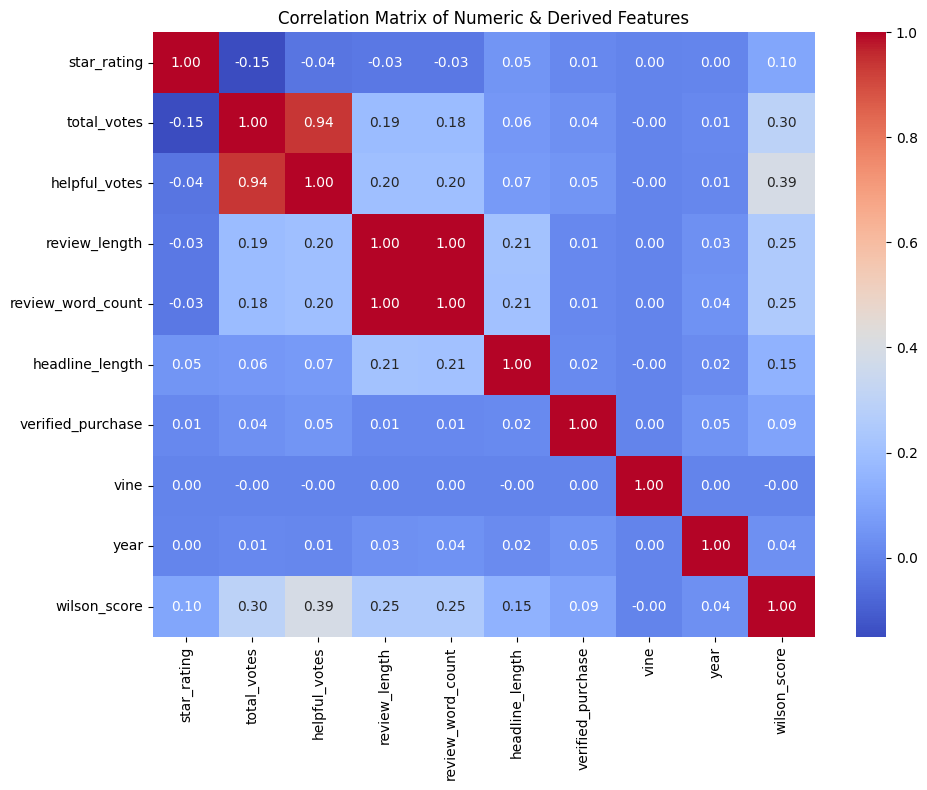

In [ ]:
# Build correlation-ready DataFrame
df_corr = df.copy()

# Feature engineering (if not already done)
df_corr['review_length'] = df_corr['review_body'].astype(str).apply(len)
df_corr['review_word_count'] = df_corr['review_body'].astype(str).apply(lambda x: len(x.split()))
df_corr['headline_length'] = df_corr['review_headline'].astype(str).apply(len)
df_corr['verified_purchase'] = df_corr['verified_purchase'].map({'Y': 1, 'N': 0})
df_corr['vine'] = df_corr['vine'].map({'Y': 1, 'N': 0})
df_corr['year'] = df_corr['review_date'].dt.year
df_corr['helpful_ratio'] = df_corr.apply(
    lambda row: wilson_lower_bound(row['helpful_votes'], row['total_votes']), axis=1
)

# Select numeric columns for correlation
cols_to_corr = [
    'star_rating', 'total_votes', 'helpful_votes',
    'review_length', 'review_word_count', 'headline_length',
    'verified_purchase', 'vine', 'year', 'helpful_ratio'
]

# Calculate correlation matrix
corr_matrix = df_corr[cols_to_corr].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric & Derived Features")
plt.tight_layout()
plt.show()

### Save the Data

In [88]:
# Drop unnecessary columns
columns_to_drop = [
    'marketplace',
    'product_category',
    'review_id',
    'review_date',  # only if year/month extracted
    'product_id',   # only if product_parent used
    'customer_id',  # only after reviewer-level features are created
    'product_title' # optional if product_parent and mappings are used
]

df.drop(columns=columns_to_drop, axis=1, inplace=True)

# Save the DataFrame
output_file_path = '../data/02_preprocessed_data/processed_reviews.tsv'
df.to_csv(output_file_path, sep='\t', index=False)

In [89]:
df.head()

,product_parent,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,engaged,helpful_ratio,helpful_class,year,review_length,length_bin,headline_length,headline_len_bin,is_top_reviewer
0,122662979,4.0,2.0,3.0,N,N,this book was a great learning novel!,this boook was a great one that you could lear...,True,0.207660,low,2005,1320,"(1000, 3000]",37,"(30, 60]",False
1,56191234,3.0,5.0,5.0,N,N,Fun Fluff,If you are looking for something to stimulate ...,True,0.565518,High,2005,238,"(100, 300]",9,"(0, 10]",False
2,253182049,4.0,1.0,22.0,N,N,this isn't a review,never read it-a young relative idicated he lik...,True,0.008069,Very Low,2005,104,"(100, 300]",19,"(10, 30]",False
3,348672532,5.0,2.0,2.0,N,N,fine author on her A-game,Though she is honored to be Chicago Woman of t...,True,0.342380,Medium,2005,1588,"(1000, 3000]",25,"(10, 30]",True
4,598678717,4.0,0.0,2.0,N,N,Execellent cursor examination,Review based on a cursory examination by Unive...,True,0.000000,Zero,2005,508,"(300, 1000]",29,"(10, 30]",False


In [90]:
df.columns

Index(['product_parent', 'star_rating', 'helpful_votes', 'total_votes', 'vine',
       'verified_purchase', 'review_headline', 'review_body', 'engaged',
       'helpful_ratio', 'helpful_class', 'year', 'review_length', 'length_bin',
       'headline_length', 'headline_len_bin', 'is_top_reviewer'],
      dtype='object')